In [1]:
import scanpy as sc
import graph_tool.all as gt
import schist
import pandas as pd
import anndata
import pickle
import mygene
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [114]:
#weighted nSBM weighted model
w_weighted_l1=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_w10XV3_l1.pkl','rb'))
w_weighted_l2=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_w10XV3_l2.pkl','rb'))
#weighted nSBM flat model
w_flat_l1=pickle.load(open('cell_affinity_significance/minimize_linear_flat_w10XV3_l1.pkl','rb'))
w_flat_l2=pickle.load(open('cell_affinity_significance/minimize_linear_flat_w10XV3_l2.pkl','rb'))
#unweighted nSBM weighted model
unw_weighted_l1=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_10XV3_l1.pkl','rb'))
unw_weighted_l2=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_10XV3_l2.pkl','rb'))
#unweighted nSBM flat model
unw_flat_l1=pickle.load(open('cell_affinity_significance/minimize_linear_flat_10XV3_l1.pkl','rb'))
unw_flat_l2=pickle.load(open('cell_affinity_significance/minimize_linear_flat_10XV3_l2.pkl','rb'))

In [2]:
#weighted nSBM
adata=schist.io.read('../scRNA_paga/state_adata/10XV3_minimize_weighted')
#weight model
weighted_w_info_l1=load('cell_affinity_significance/w10XV3_weighted_level_1.npz')
weighted_w_info_l2=load('cell_affinity_significance/w10XV3_weighted_level_2.npz')
weighted_w_info_l3=load('cell_affinity_significance/w10XV3_weighted_level_3.npz')
#flat model
weighted_f_info_l1=load('cell_affinity_significance/w10XV3_weighted_level_1.npz')
weighted_f_info_l2=load('cell_affinity_significance/w10XV3_weighted_level_2.npz')
weighted_f_info_l3=load('cell_affinity_significance/w10XV3_weighted_level_3.npz')

In [121]:
#unweighted nSBM
adata=schist.io.read('../scRNA_paga/state_adata/10XV3_minimize')
#weight model
unweighted_w_info_l1=load('cell_affinity_significance/10XV3_weighted_level_1.npz')
unweighted_w_info_l2=load('cell_affinity_significance/10XV3_weighted_level_2.npz')
unweighted_w_info_l3=load('cell_affinity_significance/10XV3_weighted_level_3.npz')
#flat model
unweighted_f_info_l1=load('cell_affinity_significance/10XV3_weighted_level_1.npz')
unweighted_f_info_l2=load('cell_affinity_significance/10XV3_weighted_level_2.npz')
unweighted_f_info_l3=load('cell_affinity_significance/10XV3_weighted_level_3.npz')

In [68]:
markers=pd.read_excel("markers_hca.ods", engine="odf",header=2,index_col=None)

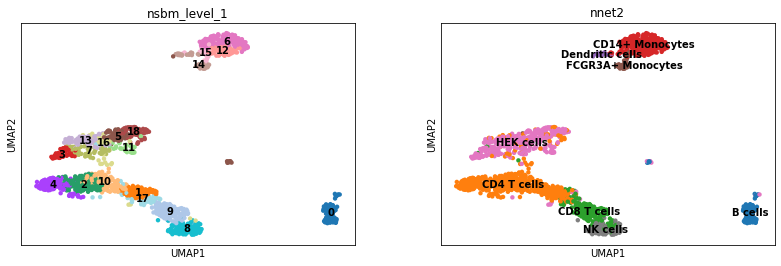

In [7]:
sc.pl.umap(adata,color=['nsbm_level_1','nnet2'],legend_loc ='on data')

In [84]:
significative=0    
for group in adata.obs.nsbm_level_2.cat.categories:
    sig_level=len([x for x in f_pvals_l2[:,int(group)] if x <0.05])
    significative=significative+sig_level
print(significative)

25663


# 1) Number of genes
In order to assess the validity of cells-weigths calculated by nSBM model. We firstly compared the the amount of significative genes found by regular flat analysis to the number of significative genes gained through the analysis affected by cells-weights. The more succesfull and effecctive is the analysis, the higher is the number of significative genes.

In [128]:
w=weighted_w_info_l1
f=weighted_f_info_l1
w_pvals=w['pvals']
w_fdr=w['fdr']
w_scores=w['scores']
f_pvals=f['pvals']
f_fdr=f['fdr']
f_scores=f['scores']

### flat model

(array([2082.,  341.,  287.,  226.,  225.,  216.,  205.,  173.,  174.,
         185.,  173.,  172.,  161.,  148.,  178.,  151.,  159.,  127.,
         134.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

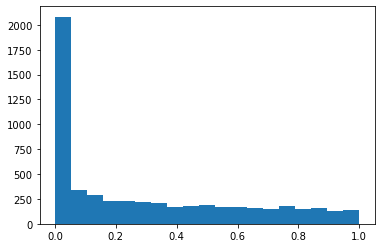

In [10]:
hist(f_pvals_l2[:,6],bins=np.linspace(0,1,20))

In [14]:
np.sum(f_padj_l2<1e-2,axis=0)

array([ 739,  541, 1181, 1382,   36, 2036, 1304,  561,  513,  110,  937,
        149,  256])

In [15]:
np.sum(w_padj_l2<1e-2,axis=0)

array([ 736,  544, 1190, 1392,   34, 2032, 1309,  519,  515,   91,  928,
        152,  261])

### weighted model

(array([2080.,  355.,  281.,  218.,  204.,  232.,  202.,  172.,  192.,
         172.,  165.,  167.,  167.,  159.,  176.,  148.,  155.,  145.,
         127.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

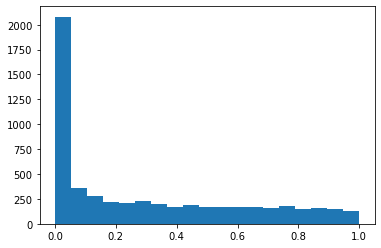

In [11]:
hist(w_pvals_l2[:,6],bins=np.linspace(0,1,20))

In [73]:
significative=0
for group in adata.obs.nsbm_level_2.cat.categories:
    sig_level=len([x for x in un_w_pvals_l2[:,int(group)] if x <0.05])
    significative=significative+sig_level
print(significative)

18089


### scanpy

In [6]:
sc.tl.rank_genes_groups(adatam,groupby='nsbm_level_2',n_genes=-1)

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


(array([6.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 2.000e+00,
        7.000e+00, 0.000e+00, 5.000e+00, 7.000e+00, 6.000e+00, 3.000e+00,
        0.000e+00, 4.000e+00, 1.600e+01, 1.500e+01, 7.000e+00, 2.900e+01,
        5.396e+03]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

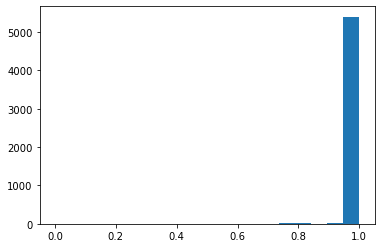

In [7]:
hist([adatam.uns['rank_genes_groups']['pvals_adj'][x][9] for x in range(5516)],bins=np.linspace(0,1,20))

scanpy tool performs worse than our tool
### conclusions
The main information we achieved is that there is not a huge difference between weighted model and flat model in terms of number of significative genes, but usually the weighted model increase the number of genes with significative p-values

# 2) Markers
Our second approach was focused on finding the concordance between marker-genes of each cell-type in the sample and the 100 most significative genes of each group found by nSBM. After that, the performance of the weighted model was compered to the performance of the flat model

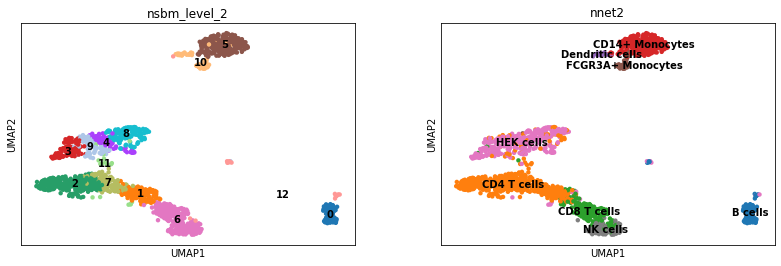

nnet2,B cells,CD4 T cells,CD8 T cells,CD14+ Monocytes,Dendritic cells,FCGR3A+ Monocytes,HEK cells,NK cells
nsbm_level_2,,,,,,,,
0,88,0,0,0,0,0,0,0
1,0,102,19,0,0,0,3,0
2,0,281,0,0,0,0,0,0
3,0,3,2,0,0,0,85,0
4,0,4,0,0,0,1,52,0
5,0,0,0,233,1,3,0,0
6,0,0,151,0,0,0,0,100
7,0,103,0,0,0,0,0,0
8,0,19,0,0,0,0,95,0


In [82]:
sc.pl.umap(adata, color=['nsbm_level_2','nnet2'],legend_loc='on data')
pd.crosstab(adata.obs['nsbm_level_2'],adata.obs['nnet2'])

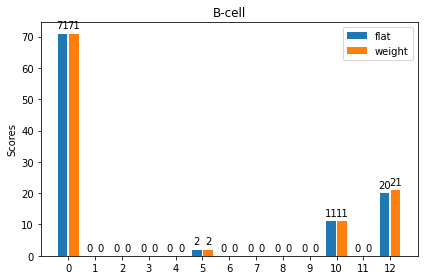

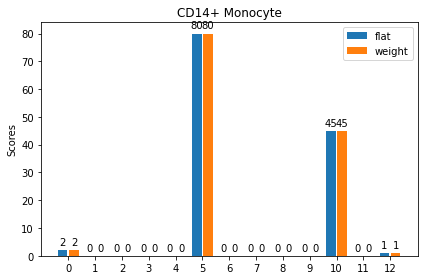

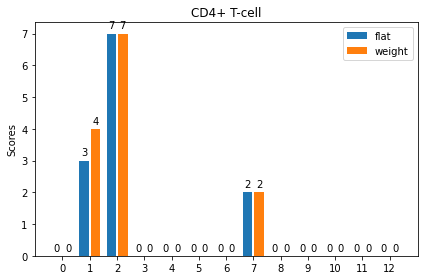

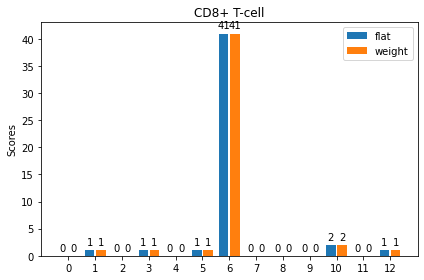

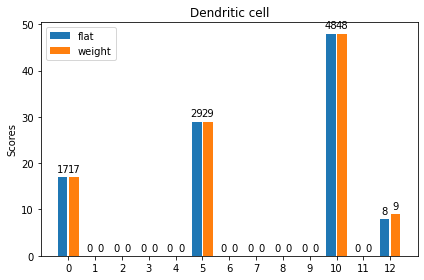

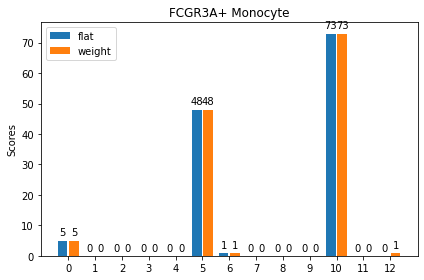

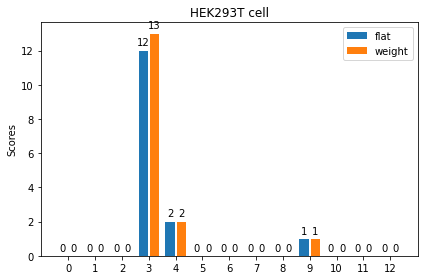

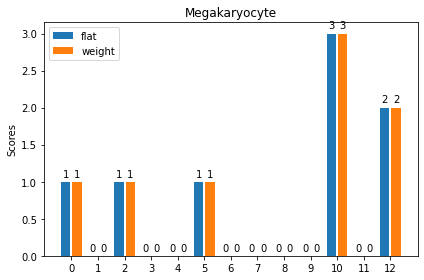

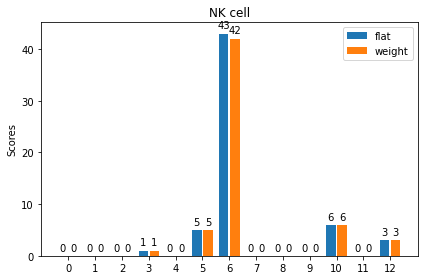

In [115]:
for celltype in range(len(markers.columns)):
    wm=[]
    fm=[]
    flat=0
    weight=0
    gene=[str(i) for i in markers.iloc[:,celltype]]
    for i in adata.obs['nsbm_level_2'].cat.categories:
        high_exp=[d for d in unw_flat_l2[i]['scores'] if d>1]
        for j in range(len(high_exp)):
            if unw_flat_l2[i]['gene_names'][j] in gene:
                flat=flat+1
        fm.append(flat)
        flat=0
        high_exp=[d for d in unw_weighted_l2[i]['scores'] if d>1]
        for s in range(len(high_exp)):
            if unw_weighted_l2[i]['gene_names'][s] in gene:
                weight=weight+1
        wm.append(weight)
        weight=0
    labels = adata.obs['nsbm_level_2'].cat.categories
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 0.6*width, fm, width, label='flat')
    rects2 = ax.bar(x + 0.6*width, wm, width, label='weight')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(f'{markers.columns[celltype]}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.show()


Also in this case there are few differences between the two models, but weighted model is still sligthly better than flat model:




   1) Hek cells for example are present also in group 3 and 16 and weighted model shows higher number of matched genes for these two groups with HEK markers
   
   
   
   2) 15/20 of dendritic cells are located in groupp 14 and also in this case, the weighted model showed an higher concordance with marker genes

In [45]:
group=str(6)
ciao=pd.DataFrame([w_flat_l1[group]['pvals_adj'],w_flat_l1[group]['scores'],w_flat_l1[group]['gene_names']],index=['pval','score','name']).T
ciao.sort_values('score',axis=0)

,pval,score,name
1164,0.0401301,0.14233,AC020922.4
1163,0.0309242,0.14318,FOXN3-AS1
1162,0.000968441,0.148152,AC138150.2
1161,0.0477083,0.149869,RNVU1-18
1160,0.0475519,0.155075,SLC22A16
...,...,...,...
4,0,2.06778,FCN1
3,0,2.19144,VCAN
2,0,2.47041,S100A9
1,0,2.5236,S100A12


In [12]:
level=1
scipy.stats.entropy(adata.uns['nsbm']['cell_affinity'][f'{level}'], axis=0)/ np.log(adata.shape[0])

array([0.62708814, 0.62985349, 0.70738705, 0.53569992, 0.65053945,
       0.54778985, 0.69830081, 0.54843649, 0.65234052, 0.67140075,
       0.63682806, 0.48080741, 0.56835778, 0.59735989, 0.55884583,
       0.41516778, 0.46790735, 0.49944253, 0.5763054 ])

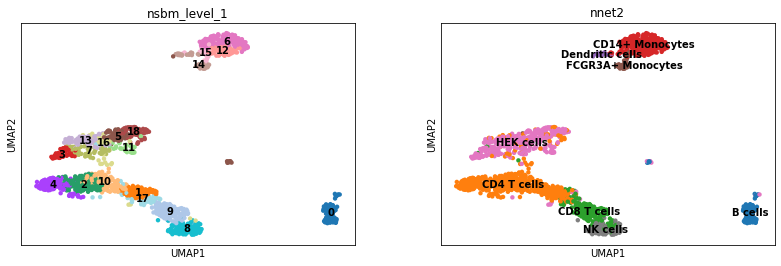

In [8]:
sc.pl.umap(adata, color=['nsbm_level_1','nnet2'],legend_loc='on data')
